## Описание проекта
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Инструкция по выполнению

### Шаг №1. Откройте таблицу и изучите общую информацию о данных
* [Знакомство с данными](#step1) 

### Шаг №2. Предобработка данных
* [Определите и заполните пропущенные значения;](#step2) 
* [Опишите, какие пропущенные значения вы обнаружили;](#step3) 
* [Приведите возможные причины появления пропусков в данных;](#step4) 
* [Объясните, по какому принципу заполнены пропуски;](#step5) 
* [Замените вещественный тип данных на целочисленный;](#step6) 
* [Поясните, как выбирали метод для изменения типа данных;](#step7) 
* [Удалите дубликаты;](#step8) 
* [Поясните, как выбирали метод для поиска и удаления дубликатов в данных;](#step9) 
* [Приведите возможные причины появления дубликатов;](#step10) 
* [Выделите леммы в значениях столбца с целями получения кредита;](#step11) 
* [Опишите, как вы проводили лемматизацию целей кредита;](#step12) 
* [Категоризируйте данные;](#step13) 

В данных могут встречаться артефакты — значения, которые не отражают действительность. Например, отрицательное количество дней трудового стажа. Для реальных данных — это нормально. Нужно описать возможные причины появления таких данных и обработать их.

### Шаг №3. Ответьте на вопросы
* [Есть ли зависимость между наличием детей и возвратом кредита в срок?](#step14) 
* [Есть ли зависимость между семейным положением и возвратом кредита в срок?](#step15) 
* [Есть ли зависимость между уровнем дохода и возвратом кредита в срок?](#step16) 
* [Как разные цели кредита влияют на его возврат в срок?](#step17) 

Ответы сопроводите интерпретацией — поясните, о чём именно говорит полученный вами результат.

### Шаг №4. Напишите общий вывод
* [Итоговый вывод](#step18)

#### Описание данных
1. `children` — количество детей в семье
2. `days_employed` — общий трудовой стаж в днях
3. `dob_years` — возраст клиента в годах
4.  `education` — уровень образования клиента
5.  `education_id` — идентификатор уровня образования
6. `family_status` — семейное положение
7. `family_status_id` — идентификатор семейного положения
8. `gender` — пол клиента
9. `income_type` — тип занятости
10. `debt` — имел ли задолженность по возврату кредитов
11. `total_income` — ежемесячный доход
12. `purpose` — цель получения кредита

## Шаг №1. Знакомство с данными  
<a id="step1"></a>  

In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymystem3 import Mystem
from collections import Counter
import seaborn as sns

In [399]:
df = pd.read_csv('/datasets/data.csv')

In [400]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Вывод: 

В результате знакомства с данными удалось обнаружить, что в двух столбцах имеются пропущенные значения, которые необходимо проработать.<a id="step2"></a>  

## Шаг №2. Предобработка данных

Пропущенные значения у нас есть в колонках `days_employed` и `total_income`. Посчитаем сколько их всех и установим процент пропусков. <a id="step3"></a>  

In [402]:
df['days_employed'].isna().agg([sum, 'mean'])

sum     2174.000000
mean       0.100999
Name: days_employed, dtype: float64

In [403]:
df['total_income'].isna().agg([sum, 'mean'])

sum     2174.000000
mean       0.100999
Name: total_income, dtype: float64

Как мы видим, количество пропусков вместе с их долей в во всем датафрейме совпадает. Теперь взглянем на датасет только с пропусками и попытаемся найти общую закономерность

In [404]:
nan = df[df['days_employed'].isna() == True]

In [405]:
nan.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21152,1,NaN,40,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,операции с недвижимостью
5534,0,NaN,61,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,покупка жилья
15327,0,NaN,29,среднее,1,женат / замужем,0,M,компаньон,0,NaN,операции со своей недвижимостью
5329,0,NaN,34,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,на покупку автомобиля
9491,0,NaN,46,среднее,1,в разводе,3,F,сотрудник,0,NaN,автомобили
760,0,NaN,54,среднее,1,гражданский брак,1,M,сотрудник,0,NaN,сыграть свадьбу
1568,1,NaN,36,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,операции с коммерческой недвижимостью
4078,0,NaN,63,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,свадьба
3378,0,NaN,62,среднее,1,женат / замужем,0,F,пенсионер,0,NaN,покупка коммерческой недвижимости
279,0,NaN,44,Среднее,1,гражданский брак,1,F,сотрудник,0,NaN,операции со своей недвижимостью


<a id="step4"></a>  Какой-то общей закономерности в пропусках обнаружить не получилось. Данных здесь скорее или просто криво выгружены или просто специально поломаны без определенной логики.

При просмотре выборки по NAN я заметил, что у 76 человек указано 20 детей, чего в действительности быть не может.
У некоторых людей отрицательное количество детей. Поскольку от нас требуют разобраться, влияет ли семейное положение и
количество детей клиента на факт погашения кредита в срок, то количество детей должно соответствовать действительности.


In [406]:
print(df['children'].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


Уверен, что в данных ошибка, так как количество детей 20 - это больше похоже на Аномалию, чем на реальность. Скорее всего, тут лишний 0, поэтому заменим 20 на 2. Даже если логика замены у нас окажется неверной, то это не повлияет на итоговые выводы, так как данных мало.

In [407]:
df.loc[df['children'] == 20] = df.loc[df['children'] == 20].replace(to_replace = 20, value = 2)
df['children'] = abs(df['children'])

In [408]:
print(df['children'].value_counts())

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64


In [409]:
pd.cut(df['dob_years'], 5).value_counts()

(30.0, 45.0]      8504
(45.0, 60.0]      7057
(15.0, 30.0]      3723
(60.0, 75.0]      2140
(-0.075, 15.0]     101
Name: dob_years, dtype: int64

Как мы видим, у нас есть клиенты, у которых в графе возраст есть отрицательные значения и совсем маленькие. Логично, что тут произошла какая-то ошибка при выкачке данных. Поскольку этих данных совсем мало, то их удаление не повлияет на результаты анализа. 

In [410]:
df = df[df['dob_years'] > 15].reset_index()

In [411]:
df

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21419,21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21420,21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21421,21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21422,21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


В целом, какой-то общей закономерности пропусков не удалось обнаружить

<a id="step5"></a>  Пропишем логику замены пропусков: 

Постараемся вывести несколько возрастных категорий, для которых по гендерным признакам определим медианные значения Стажа и Совокупного дохода. Полученные переменные и будем использоваться для замены пропусков.

In [412]:
def category(age):
    if age <= 30:
        return 'молодые'
    if age > 30 and age <= 45:
        return 'взрослые'
    if age > 45 and age <= 60:
        return 'пожилые'
    return 'пенсионеры'

In [413]:
df['category'] = df['dob_years'].apply(category)

In [414]:
df

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,category
0,0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,взрослые
1,1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,взрослые
2,2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,взрослые
3,3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,взрослые
4,4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,пожилые
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21419,21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем,взрослые
21420,21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем,пенсионеры
21421,21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость,взрослые
21422,21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля,взрослые


Посмотрим для каждой возрастной категории среднее значение по гендерным признакам.

In [415]:
gender_category = df.pivot_table(index = 'category', columns = 'gender', values = 'total_income', aggfunc = 'median')

In [416]:
gender_category

gender,F,M,XNA
category,,,
взрослые,140315.766455,176410.847993,NaN
молодые,130187.630873,162513.291433,203905.157261
пенсионеры,121084.030049,131382.818886,NaN
пожилые,133412.900442,166523.462873,NaN


У нас появилось какое-то лишнее значение в графе `gender`, попробуем глянуть сколькор их.

In [417]:
df['gender'].value_counts()

F      14164
M       7259
XNA        1
Name: gender, dtype: int64

Можно сразу избавиться от XNA, чтобы это значение не мешало в дальнейшем. 

In [418]:
df = df.query('gender != "XNA"').reset_index()

In [419]:
df.sample(5)

,level_0,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,category
6264,6264,6289,2,-6720.656976,48,среднее,1,женат / замужем,0,M,сотрудник,0,216533.628283,покупка жилья для сдачи,пожилые
11756,11757,11815,0,-183.133395,29,высшее,0,Не женат / не замужем,4,F,сотрудник,0,143493.101530,образование,молодые
11080,11081,11134,1,-241.305330,32,среднее,1,женат / замужем,0,F,компаньон,0,102205.689836,операции с коммерческой недвижимостью,взрослые
1942,1942,1952,0,-1311.318902,33,высшее,0,в разводе,3,F,компаньон,0,401986.219653,покупка жилья для сдачи,взрослые
7340,7340,7377,0,-509.713245,57,среднее,1,женат / замужем,0,F,компаньон,0,102045.198251,жилье,пожилые


У нас появились лишние столбцы с индексами, которые не несут никакого смысла. Все это можно удлать.

In [420]:
df = df.drop(['level_0', 'index'], axis = 1)

In [421]:
woman_adult = gender_category['F'][0]
woman_young = gender_category['F'][1]
woman_pensioner = gender_category['F'][2]
woman_old = gender_category['F'][3]
man_adult = gender_category['M'][0]
man_young = gender_category['M'][1]
man_pensioner = gender_category['M'][2]
man_old = gender_category['M'][3]

In [422]:
t = df['gender']
k = df['category']
g = []
for i in range(len(k)):
    if t[i] == 'F'and k[i] == 'взрослые':
        g.append(woman_adult)
    if t[i] == 'F'and k[i] == 'молодые':
        g.append(woman_young)
    if t[i] == 'F'and k[i] == 'пенсионеры':
        g.append(woman_pensioner)
    if t[i] == 'F'and k[i] == 'пожилые':
        g.append(woman_old)
    if t[i] == 'M' and k[i] == 'взрослые':
        g.append(man_adult)
    if t[i] == 'M'and k[i] == 'молодые':
        g.append(man_young)
    if t[i] == 'M'and k[i] == 'пенсионеры':
        g.append(man_pensioner)
    if t[i] == 'M'and k[i] == 'пожилые':
        g.append(man_old)

In [423]:
df['inc_cat'] = pd.Series(g)

In [424]:
df.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,category,inc_cat
1935,0,-1783.961603,47,среднее,1,женат / замужем,0,F,сотрудник,0,80438.346027,покупка жилья для сдачи,пожилые,133412.900442
2136,3,-967.299674,50,среднее,1,женат / замужем,0,M,сотрудник,0,327678.582993,покупка коммерческой недвижимости,пожилые,166523.462873
14521,2,-1388.764492,36,высшее,0,женат / замужем,0,F,сотрудник,0,89307.797746,покупка коммерческой недвижимости,взрослые,140315.766455
6679,1,-5694.235265,38,Среднее,1,в разводе,3,F,сотрудник,0,116933.911126,образование,взрослые,140315.766455
485,0,393452.144500,62,Среднее,1,женат / замужем,0,F,пенсионер,0,173640.350882,строительство жилой недвижимости,пенсионеры,121084.030049
9447,0,NaN,46,среднее,1,в разводе,3,F,сотрудник,0,NaN,автомобили,пожилые,133412.900442
6651,1,-701.649181,30,среднее,1,женат / замужем,0,M,сотрудник,0,190724.463480,строительство жилой недвижимости,молодые,162513.291433
1839,2,-679.171126,35,среднее,1,Не женат / не замужем,4,M,сотрудник,0,105564.046194,жилье,взрослые,176410.847993
19753,0,371428.655547,55,среднее,1,женат / замужем,0,F,пенсионер,0,123802.672334,ремонт жилью,пожилые,133412.900442
15802,0,-610.953782,26,среднее,1,Не женат / не замужем,4,F,сотрудник,0,115564.042615,покупка жилья,молодые,130187.630873


In [425]:
df['total_income'] = df['total_income'].fillna(df['inc_cat'])

Переведем отрицательные знацения стажа в абсолютные

In [426]:
df['days_employed'] = abs(df['days_employed'])

Считаю, что здесь можно воспользоваться такой же логикой замены пропусков какая была при замене `total_income`

In [427]:
for_days_emp = df.pivot_table(index = 'category', columns = 'gender', values = 'days_employed', aggfunc = 'median')

In [428]:
for_days_emp

gender,F,M
category,,
взрослые,1831.729975,1606.607248
молодые,1097.531171,981.593723
пенсионеры,358166.492161,347977.727190
пожилые,4851.384110,2412.732199


In [429]:
woman_adult_days = for_days_emp['F'][0]
woman_young_days = for_days_emp['F'][1]
woman_pensioner_days = for_days_emp['F'][2]
woman_old_days = for_days_emp['F'][3]
man_adult_days = for_days_emp['M'][0]
man_young_days = for_days_emp['M'][1]
man_pensioner_days = for_days_emp['M'][2]
man_old_days = for_days_emp['M'][3]

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21423 entries, 0 to 21422
Data columns (total 14 columns):
children            21423 non-null int64
days_employed       19259 non-null float64
dob_years           21423 non-null int64
education           21423 non-null object
education_id        21423 non-null int64
family_status       21423 non-null object
family_status_id    21423 non-null int64
gender              21423 non-null object
income_type         21423 non-null object
debt                21423 non-null int64
total_income        21423 non-null float64
purpose             21423 non-null object
category            21423 non-null object
inc_cat             21423 non-null float64
dtypes: float64(3), int64(5), object(6)
memory usage: 2.3+ MB


In [431]:
c = df['gender']
v = df['category']
h = []
for i in range(len(v)):
    if c[i] == 'F'and v[i] == 'взрослые':
        h.append(woman_adult_days)
    if c[i] == 'F'and v[i] == 'молодые':
        h.append(woman_young_days)
    if c[i] == 'F'and v[i] == 'пенсионеры':
        h.append(woman_pensioner_days)
    if c[i] == 'F'and v[i] == 'пожилые':
        h.append(woman_old_days)
    if c[i] == 'M' and v[i] == 'взрослые':
        h.append(man_adult_days)
    if c[i] == 'M'and v[i] == 'молодые':
        h.append(man_young_days)
    if c[i] == 'M'and v[i] == 'пенсионеры':
        h.append(man_pensioner_days)
    if c[i] == 'M'and v[i] == 'пожилые':
        h.append(man_old_days)

In [432]:
len(h)

21423

In [433]:
df['days'] = pd.Series(h)
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,category,inc_cat,days
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,взрослые,140315.766455,1831.729975
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,взрослые,140315.766455,1831.729975
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,взрослые,176410.847993,1606.607248
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,взрослые,176410.847993,1606.607248
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,пожилые,133412.900442,4851.384110
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,молодые,162513.291433,981.593723
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,взрослые,140315.766455,1831.729975
7,0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,пожилые,166523.462873,2412.732199
8,2,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,взрослые,140315.766455,1831.729975
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,взрослые,176410.847993,1606.607248


In [434]:
df['days_employed'] = df['days_employed'].fillna(df['days'])

In [435]:
df.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,category,inc_cat,days
19422,0,2370.647581,50,среднее,1,женат / замужем,0,F,сотрудник,1,295467.136159,получение дополнительного образования,пожилые,133412.900442,4851.384110
1877,2,4928.673426,32,высшее,0,женат / замужем,0,F,сотрудник,0,225524.767443,образование,взрослые,140315.766455,1831.729975
20642,0,54.008334,40,среднее,1,вдовец / вдова,2,F,сотрудник,0,132081.251466,покупка жилья,взрослые,140315.766455,1831.729975
10742,1,1171.672437,40,среднее,1,женат / замужем,0,M,сотрудник,0,252060.081928,получение образования,взрослые,176410.847993,1606.607248
17818,1,1606.607248,36,неоконченное высшее,2,женат / замужем,0,M,сотрудник,0,176410.847993,покупка жилья для семьи,взрослые,176410.847993,1606.607248
5246,1,730.801183,38,среднее,1,Не женат / не замужем,4,F,сотрудник,0,142479.698116,покупка жилья,взрослые,140315.766455,1831.729975
8167,1,3242.043058,52,высшее,0,гражданский брак,1,F,компаньон,0,117556.767913,свадьба,пожилые,133412.900442,4851.384110
11979,0,374.437097,27,среднее,1,женат / замужем,0,M,компаньон,0,163436.556493,сделка с автомобилем,молодые,162513.291433,981.593723
9566,0,354239.970267,59,среднее,1,гражданский брак,1,M,пенсионер,1,123807.845191,сыграть свадьбу,пожилые,166523.462873,2412.732199
8015,0,4087.638517,47,СРЕДНЕЕ,1,гражданский брак,1,F,сотрудник,0,110311.371555,свадьба,пожилые,133412.900442,4851.384110


Уберем лишние столбцы, которые нам больше не понадобятся.

In [436]:
df = df.drop(['inc_cat', 'days'], axis = 1)

<a id="step6"></a>  Теперь округлим и заменим тип данных в столбцах `days_employed` и `total_income` для дальнейшего удоства.

In [437]:
df['days_employed'] = round(df['days_employed'], 0)
df['days_employed'] = df['days_employed'].astype(int)
df['total_income'] = round(df['total_income'], 0)
df['total_income'] = df['total_income'].astype(int)

<a id="step7"></a>  При помощи метода Round мы округлили значения и перевели их в целочисленный формат. Посмотрим что получилось.

In [438]:
df.dtypes

children             int64
days_employed        int64
dob_years            int64
education           object
education_id         int64
family_status       object
family_status_id     int64
gender              object
income_type         object
debt                 int64
total_income         int64
purpose             object
category            object
dtype: object

In [439]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,category
0,1,8438,42,высшее,0,женат / замужем,0,F,сотрудник,0,253876,покупка жилья,взрослые
1,1,4025,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,взрослые
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145886,покупка жилья,взрослые
3,3,4125,32,среднее,1,женат / замужем,0,M,сотрудник,0,267629,дополнительное образование,взрослые
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,пожилые
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21418,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224792,операции с жильем,взрослые
21419,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,156000,сделка с автомобилем,пенсионеры
21420,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89673,недвижимость,взрослые
21421,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,взрослые


<a id="step8"></a>Теперь посмотрим на количество дубликатов и при необходимости удалим их.

In [462]:
df.duplicated().sum()


0

<a id="step9"></a>При помощи drop_duplicates избавимся от дублей и сбросим Индекс, чтобы не было проблем при дальнейшем анализе.

In [463]:
df = df.drop_duplicates().reset_index(drop = True)

<a id="step10"></a>У нас в итоге было всего 54 дубликата. Необходимо сообщить об этом Data инженеру чтобы избежать их появления в дальнейшем.

<a id="step11"></a>Для дальнейшего анализа нам необходимо определить леммы, чтобы мы смогли отфильтровать клиентов по причинам займа. 

In [443]:
from pymystem3 import Mystem
m = Mystem()
from collections import Counter

При помощи Лемматизатора Mystem попытаемся определить леммы для каждой строки столбца `purpose` и сохраним их в отдельный список. 

In [444]:
key = df['purpose']
lem = []
for i in key:
    result = ''.join(m.lemmatize(i)).strip()
    lem.append(result)

df1 = pd.DataFrame(data=lem, columns=['lemmas'])

In [445]:
df1

,lemmas
0,покупка жилье
1,приобретение автомобиль
2,покупка жилье
3,дополнительный образование
4,сыграть свадьба
...,...
21364,операция с жилье
21365,сделка с автомобиль
21366,недвижимость
21367,на покупка свой автомобиль


<a id="step12"></a>При помощи лемматизации мы определили все значения целей кредитования и сохранили их в отдельном Датафрейме, чтобы все корректно поделить на категории. 

Теперь сделаем категоризацию данных на основе имеющегося Датафрейма после лемматизации.

In [449]:
def uniq(text):
    m.lemmatize(text)
    if ('жилье' in text or 'недвижимость' in text):
        return 'недвижимость'
    if ('автомобиль' in text):
        return 'авто'
    if ('образование' in text):
        return 'образование'
    if ('свадьба' in text):
        return 'свадьба'
    return 'прочее'
    
#добавляем в Датафрейм корректные категории целей выдачи кредита для дальнейшего анализа.    
df['for_category'] = df1['lemmas'].apply(uniq)

df.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,category,for_category
15136,3,1607,38,высшее,0,женат / замужем,0,M,компаньон,0,176411,жилье,взрослые,недвижимость
16717,0,373728,62,среднее,1,женат / замужем,0,F,пенсионер,1,174526,ремонт жилью,пенсионеры,недвижимость
20560,0,4182,49,среднее,1,в разводе,3,F,компаньон,0,148139,покупка коммерческой недвижимости,пожилые,недвижимость
10193,0,369335,61,Среднее,1,женат / замужем,0,F,пенсионер,0,174388,высшее образование,пенсионеры,образование
6957,2,5339,38,среднее,1,Не женат / не замужем,4,M,сотрудник,1,148892,приобретение автомобиля,взрослые,авто
16853,1,1832,33,среднее,1,гражданский брак,1,F,компаньон,0,140316,свадьба,взрослые,свадьба
6689,4,1181,36,высшее,0,женат / замужем,0,F,госслужащий,0,154702,покупка жилья,взрослые,недвижимость
12328,0,1204,53,высшее,0,женат / замужем,0,F,компаньон,0,443270,строительство недвижимости,пожилые,недвижимость
3929,2,3369,41,среднее,1,женат / замужем,0,F,компаньон,0,130615,покупка жилья для сдачи,взрослые,недвижимость
2930,0,328,24,среднее,1,гражданский брак,1,M,госслужащий,0,178486,покупка недвижимости,молодые,недвижимость


<a id="step13"></a>При помощи Лемматизации мы смогли классифицировать клиентов на категории.

Методом Квантиль определим 5 категорий уровню дохода для классификации клиентов.

In [450]:
spisok = []
for i in [0.2, 0.4, 0.6, 0.8, 1]:
    key = df['total_income'].quantile(i)
    spisok.append(key)
    print('Доля дохода при', i*100, "%", df['total_income'].quantile(i))
    
money = pd.Series(spisok)

Доля дохода при 20.0 % 98580.8
Доля дохода при 40.0 % 131970.2
Доля дохода при 60.0 % 162513.0
Доля дохода при 80.0 % 214489.20000000004
Доля дохода при 100 % 2265604.0


In [451]:
#Cоздав функцию мы определим всех клиентов на категории по доходам.

def level_income(income):
    if income <= money[0]:
        return 'очень низкий доход'
    if income <= money[1]:
        return 'низкий доход'
    if income <= money[2]:
        return 'средний доход'
    if income <= money[3]:
        return 'высокий доход'
    return 'очень высокий доход'

#Добавляем в датафрейм категории по доходам
    
df['group_income'] = df['total_income'].apply(level_income)

In [452]:
df.sample(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,category,for_category,group_income
5170,0,338914,68,высшее,0,женат / замужем,0,F,пенсионер,0,151521,строительство жилой недвижимости,пенсионеры,недвижимость,средний доход
17700,0,433,59,среднее,1,женат / замужем,0,F,сотрудник,0,92129,покупка жилья для семьи,пожилые,недвижимость,очень низкий доход
6152,0,375585,66,среднее,1,женат / замужем,0,M,пенсионер,0,110998,покупка жилой недвижимости,пенсионеры,недвижимость,низкий доход
14912,1,335067,45,среднее,1,в разводе,3,M,пенсионер,0,207000,образование,взрослые,образование,высокий доход
7798,1,3478,45,высшее,0,женат / замужем,0,F,компаньон,0,172794,недвижимость,взрослые,недвижимость,высокий доход


### Вывод: 

В ходе предобработки данных мы определили два столбца с большим количеством пропусков. Еще удалось найти некоторое количество дублей. Обо всем этом надо сообщить Data-инженеру, чтобы избежать это в будущем. 

Нам удалось определить 4 основных причины займов.
Мы подготовили данные к исследовательскому анализу.

## Шаг №3. Исследовательский анализ данных

<a id="step14"></a>Посмотрим на сводную таблицу зависимости наличия детей от возврата кредита в срок.

In [453]:
dependence_child = df.pivot_table(columns = 'debt', index = 'children', values ='dob_years' , aggfunc = 'count')
dependence_child['percent_debt'] = round(dependence_child[1] / (dependence_child[0] + dependence_child[1]), 2)
dependence_child

debt,0,1,percent_debt
children,,,
0,12979.0,1058.0,0.08
1,4398.0,442.0,0.09
2,1912.0,202.0,0.10
3,301.0,27.0,0.08
4,37.0,4.0,0.10
5,9.0,NaN,NaN


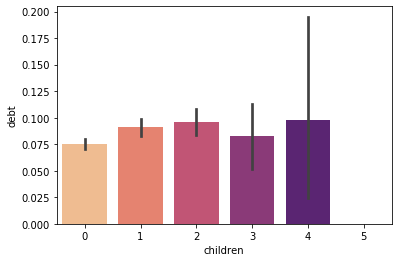

In [454]:
sns.barplot(x='children', y='debt', data=df, palette='magma_r')

Как мы видим из Визуализации, хуже всего обстоят дела с возвратом у семей с 2 и 4 детьми - 10 % должников.

Примечательно, что те у кого 5 детей, не имеют проблем с займами. Такая статистика немного пародоксальна. Получается, что такие пользователи имеют или хорошие пособия, которые помогают им справляться с обязательствами, или данное совпадение в этой выборке просто счастливое стечение обстоятельств.  

Если не учитывать семьи с 5 детьми, так как их совсем мало, то лучше всего платят кредит люди без детей.

<a id="step15"></a>Посмотрим на сводную таблицу зависимости Семейногого статуса от возврата кредита в срок.

In [455]:
dependence_family = df.pivot_table(columns = 'debt', index = 'family_status', values ='dob_years' , aggfunc = 'count')
dependence_family['percent_debt'] = round(dependence_family[1] / (dependence_family[0] + dependence_family[1]), 2)
dependence_family

debt,0,1,percent_debt
family_status,,,
Не женат / не замужем,2521,273,0.10
в разводе,1100,85,0.07
вдовец / вдова,892,62,0.06
гражданский брак,3755,386,0.09
женат / замужем,11368,927,0.08


[Text(0, 0, 'женат / замужем'),
 Text(0, 0, 'женат / замужем'),
 Text(0, 0, 'женат / замужем'),
 Text(0, 0, 'женат / замужем'),
 Text(0, 0, 'гражданский брак')]

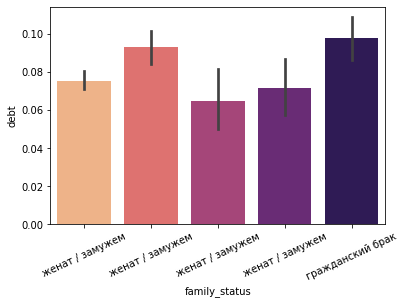

In [456]:
sns.barplot(x='family_status', y='debt', data=df, palette='magma_r').set_xticklabels(rotation=25, labels= df['family_status'])

В данной ситуации самыми хорошими заемщиками являются люди, которые состоят в браке. Их процент должников составляет в среднем 6%. Хуже всего дела у тех, кто потерял супруга или находится в гражданском браке. Процент неплательщиков составляет около 10%, что для банка является критичным показателем.  

<a id="step16"></a>Посмотрим на сводную таблицу зависимости Группы дохода от возврата кредита в срок.

In [457]:
dependence_income = df.pivot_table(columns = 'debt', index = 'group_income', values ='dob_years' , aggfunc = 'count')
dependence_income['percent_debt'] = round(dependence_income[1] / (dependence_income[0] + dependence_income[1]), 2)
dependence_income

debt,0,1,percent_debt
group_income,,,
высокий доход,3752,371,0.09
низкий доход,3925,349,0.08
очень высокий доход,3975,299,0.07
очень низкий доход,3930,344,0.08
средний доход,4054,370,0.08


[Text(0, 0, 'очень высокий доход'),
 Text(0, 0, 'низкий доход'),
 Text(0, 0, 'средний доход'),
 Text(0, 0, 'очень высокий доход'),
 Text(0, 0, 'средний доход')]

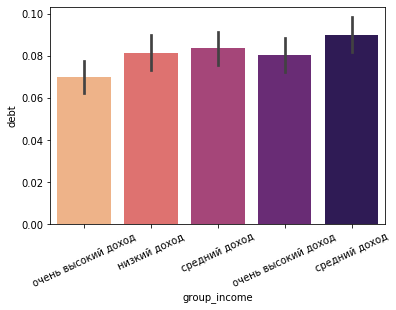

In [458]:
sns.barplot(x='group_income', y='debt', data=df, palette='magma_r').set_xticklabels(rotation=25, labels= df['group_income'])

По уровню дохода все достаточно очевидно - лучше всего с выплатами дела у тех, у кого очень высокий уровень заработка. А вот удивительно, что так называемый "Средний класс" платит обычно хуже всего. Можно сформировать вывод, если человек зарабатывает мало, то это еще не говорит о том, что он плохой заемщик.

<a id="step17"></a>Посмотрим на сводную таблицу зависимости целей займа от возврата кредита в срок.

In [459]:
dependence_category = df.pivot_table(columns = 'debt', index = 'for_category', values ='dob_years' , aggfunc = 'count')
dependence_category['percent_debt'] = round(dependence_category[1] / (dependence_category[0] + dependence_category[1]), 2)
dependence_category

debt,0,1,percent_debt
for_category,,,
авто,3886,400,0.09
недвижимость,9987,779,0.07
образование,3626,370,0.09
свадьба,2137,184,0.08


[Text(0, 0, 'недвижимость'),
 Text(0, 0, 'авто'),
 Text(0, 0, 'недвижимость'),
 Text(0, 0, 'образование')]

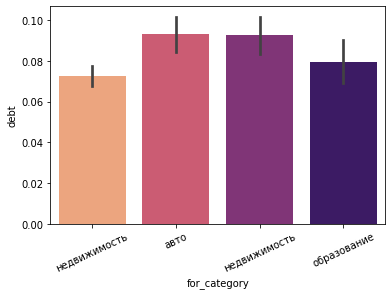

In [460]:
sns.barplot(x='for_category', y='debt', data=df, palette='magma_r').set_xticklabels(rotation=25, labels= df['for_category'])

Люди, которые берут кредиты на покупку недвижимости являются самыми добросовестными плательщиками. Скорее всего это связано с тем, что ответственность при покупке самая высокая. Не зря покупку жилья в ипотеку нельзя оформить без дополнительно страховки. Если человек платить перестанет, то может оказаться без крова над головой.  

А вот те, кто берет автомобиль в особой зоне риска. Несмотря на достаточно суровые требования к автокредиту, это не мешает людям иметь достаточно высокий процент просроченной задолженоости. Как я думаю, это связано с тем, что автомобиль ты можешь разбить или ударить очень легко, и в таких случаях могут потребоваться дополнительные средства на ремонт и восстановление авто. Люди просто не готовы в моменте оказаться без возможности передвигаться на авто, и жертвуют просрочкой по кредиту. 

## Шаг №4. Итоговый вывод

<a id="step18"></a>В результате анализа мы установили, что самым идеальным плательщиком может являться клиент без детей состоящий в браке, имеющий очень высокий уровень дохода и берущий кредит на покупку недвижимости. Нежелательным заемщиком для банка будет являться многодетный человек или в разводе или без супружеской пары, с средним уровнем дохода и желающий купить автомобиль. 

В целом эти комбинации могут варьироваться в зависимости от процентовки, но на результаты сводных таблиц стоит обращать внимания при выдаче кредита. 

Что касается самих данных, то они были выгруженных некорректно на стороне заказчика и эту проблему необходимо найти и устранить в будущем.